In [1]:
import csv
import librosa
import os
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('audio.csv')

In [249]:
data.shape

(1440, 61)

In [250]:
# most significant difference is in label 2 and label 5
print(data.groupby(data['label']).mean())

       chroma_stft_mean  rmse_mean  spec_cent_mean  spec_bw_mean  \
label                                                              
1              0.489986   0.003176     2831.402466   2503.699762   
2              0.475990   0.002666     2802.446041   2503.909503   
3              0.460749   0.012383     2850.357971   2444.752033   
4              0.476892   0.005147     2824.662555   2481.362892   
5              0.471054   0.026405     2945.666364   2472.233830   
6              0.459158   0.016034     2904.544956   2503.644325   
7              0.478096   0.006364     2896.333611   2444.724998   
8              0.490757   0.008371     2905.820761   2517.267702   

       rolloff_mean  zcr_mean       mfcc1      mfcc2      mfcc3      mfcc4  \
label                                                                        
1       5554.907407  0.254959 -679.574896  58.434117   2.369949  12.472795   
2       5455.898080  0.237586 -686.126925  59.616032   4.234747  13.319382   
3      

In [251]:
data.describe()

,label,chroma_stft_mean,rmse_mean,spec_cent_mean,spec_bw_mean,rolloff_mean,zcr_mean,mfcc1,mfcc2,mfcc3,...,chroma3,chroma4,chroma5,chroma6,chroma7,chroma8,chroma9,chroma10,chroma11,chroma12
count,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,...,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000
mean,4.733333,0.474359,0.010528,2872.737799,2482.632689,5543.181087,0.239988,-588.367579,48.779099,-5.593329,...,0.455411,0.468838,0.470083,0.481887,0.470600,0.487893,0.491290,0.483211,0.487512,0.475734
std,2.175356,0.066533,0.012926,353.358503,228.291176,569.173808,0.064798,101.909249,15.900409,12.498336,...,0.092822,0.095670,0.100935,0.096292,0.084805,0.088180,0.084178,0.080391,0.080654,0.078881
min,1.000000,0.302599,0.000351,1745.752321,1610.596634,3389.438764,0.065650,-848.919139,-4.962728,-56.336229,...,0.128318,0.130889,0.207610,0.177170,0.183575,0.206665,0.198806,0.241755,0.224129,0.244290
25%,3.000000,0.425448,0.003007,2629.653254,2363.318869,5192.721088,0.188890,-664.033720,38.565187,-13.375359,...,0.390348,0.402338,0.395801,0.416142,0.413866,0.423760,0.433328,0.428620,0.433533,0.420845
50%,5.000000,0.479404,0.005955,2867.315779,2526.483598,5604.583034,0.244730,-594.861029,49.045184,-5.332202,...,0.453805,0.469462,0.476167,0.487353,0.475360,0.489342,0.496870,0.483038,0.488760,0.478261
75%,7.000000,0.523409,0.012070,3126.978207,2642.939298,5941.814752,0.288497,-524.411625,59.989740,2.952862,...,0.523782,0.539080,0.544477,0.549991,0.525044,0.552495,0.548644,0.540563,0.542695,0.531180
max,8.000000,0.631891,0.092292,3868.886204,2994.557703,6999.876282,0.427554,-304.194572,96.945639,27.544177,...,0.754185,0.752887,0.749922,0.792345,0.738174,0.755355,0.747529,0.737119,0.721916,0.680370


In [6]:
data.head(60)

,name,label,emotion,chroma_stft_mean,rmse_mean,spec_cent_mean,spec_bw_mean,rolloff_mean,zcr_mean,mfcc1,...,chroma3,chroma4,chroma5,chroma6,chroma7,chroma8,chroma9,chroma10,chroma11,chroma12
0,03-01-01-01-01-01-01.wav,1,neutral,0.598800,0.002257,3435.943088,2600.929791,6264.656291,0.326237,-697.984245,...,0.570387,0.562410,0.551299,0.531241,0.589565,0.640624,0.644353,0.608717,0.611980,0.606167
1,03-01-01-01-01-02-01.wav,1,neutral,0.578452,0.002420,3231.037280,2646.981271,6162.832642,0.340786,-693.069755,...,0.586752,0.530952,0.529118,0.552281,0.497320,0.549519,0.584854,0.633122,0.632074,0.617527
2,03-01-01-01-02-01-01.wav,1,neutral,0.587585,0.002810,3203.154528,2605.181241,6117.338659,0.356861,-691.770194,...,0.579290,0.590824,0.573292,0.528130,0.516716,0.578961,0.639646,0.640274,0.563098,0.562465
3,03-01-01-01-02-02-01.wav,1,neutral,0.573247,0.002618,3080.483081,2644.191743,6094.210838,0.366200,-685.237871,...,0.518804,0.521994,0.584694,0.590593,0.537656,0.589734,0.611182,0.560056,0.568192,0.592452
4,03-01-02-01-01-01-01.wav,2,calm,0.561084,0.001654,3192.620354,2601.322629,6003.471105,0.313122,-727.317945,...,0.586327,0.547133,0.522434,0.539025,0.501785,0.554183,0.575118,0.618561,0.654716,0.552219
5,03-01-02-01-01-02-01.wav,2,calm,0.594369,0.001753,3132.280118,2538.472031,5753.920335,0.272489,-707.553478,...,0.614820,0.632150,0.558628,0.573193,0.621593,0.624326,0.601042,0.582282,0.598483,0.561752
6,03-01-02-01-02-01-01.wav,2,calm,0.568407,0.002621,3207.405377,2491.795149,5934.750427,0.321958,-697.403910,...,0.578676,0.586687,0.560054,0.539137,0.523845,0.569647,0.581650,0.583068,0.600798,0.576284
7,03-01-02-01-02-02-01.wav,2,calm,0.561751,0.002671,3059.506506,2532.330712,5819.635254,0.361003,-698.853907,...,0.566847,0.556585,0.519043,0.512141,0.517088,0.569958,0.595414,0.622314,0.603984,0.607804
8,03-01-02-02-01-01-01.wav,2,calm,0.590398,0.001501,3135.404317,2542.262774,5752.258759,0.253287,-734.384982,...,0.596293,0.600989,0.596449,0.612375,0.631049,0.686145,0.600609,0.527371,0.564876,0.567587
9,03-01-02-02-01-02-01.wav,2,calm,0.566464,0.001613,3103.226677,2482.234326,5584.256599,0.282715,-698.093293,...,0.532609,0.579416,0.569797,0.544425,0.561787,0.617838,0.619899,0.567548,0.538460,0.543167


In [247]:
# Classification on Calm and angry emotions as they both are nearly opposite. 
emotions_array=[]
for i,j in zip(data['label'],range(1440)):
    if i==2 or i==5:
        emotions_array.append(data.iloc[j,:])

In [212]:
data_binary_class=pd.DataFrame(emotions_array)

In [213]:
data_binary_class

,name,label,emotion,chroma_stft_mean,rmse_mean,spec_cent_mean,spec_bw_mean,rolloff_mean,zcr_mean,mfcc1,...,chroma3,chroma4,chroma5,chroma6,chroma7,chroma8,chroma9,chroma10,chroma11,chroma12
4,03-01-02-01-01-01-01.wav,2,calm,0.561084,0.001654,3192.620354,2601.322629,6003.471105,0.313122,-727.317945,...,0.586327,0.547133,0.522434,0.539025,0.501785,0.554183,0.575118,0.618561,0.654716,0.552219
5,03-01-02-01-01-02-01.wav,2,calm,0.594369,0.001753,3132.280118,2538.472031,5753.920335,0.272489,-707.553478,...,0.614820,0.632150,0.558628,0.573193,0.621593,0.624326,0.601042,0.582282,0.598483,0.561752
6,03-01-02-01-02-01-01.wav,2,calm,0.568407,0.002621,3207.405377,2491.795149,5934.750427,0.321958,-697.403910,...,0.578676,0.586687,0.560054,0.539137,0.523845,0.569647,0.581650,0.583068,0.600798,0.576284
7,03-01-02-01-02-02-01.wav,2,calm,0.561751,0.002671,3059.506506,2532.330712,5819.635254,0.361003,-698.853907,...,0.566847,0.556585,0.519043,0.512141,0.517088,0.569958,0.595414,0.622314,0.603984,0.607804
8,03-01-02-02-01-01-01.wav,2,calm,0.590398,0.001501,3135.404317,2542.262774,5752.258759,0.253287,-734.384982,...,0.596293,0.600989,0.596449,0.612375,0.631049,0.686145,0.600609,0.527371,0.564876,0.567587
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1411,03-01-05-01-02-02-24.wav,5,angry,0.417876,0.017292,2861.333822,2334.880025,5319.351901,0.243972,-494.719222,...,0.334101,0.282683,0.272493,0.359673,0.400305,0.504940,0.521181,0.467525,0.531002,0.500902
1412,03-01-05-02-01-01-24.wav,5,angry,0.354470,0.031046,2748.958312,2192.258342,5192.919922,0.232241,-423.654401,...,0.373286,0.299225,0.282970,0.313326,0.332370,0.347867,0.341465,0.349407,0.397301,0.384643
1413,03-01-05-02-01-02-24.wav,5,angry,0.366275,0.023608,2661.535939,2096.437526,4903.133138,0.234967,-462.753025,...,0.382168,0.330534,0.313366,0.335484,0.317071,0.325845,0.365135,0.330157,0.378355,0.405229
1414,03-01-05-02-02-01-24.wav,5,angry,0.472406,0.017533,3376.452833,2465.833704,6068.415527,0.289684,-494.504394,...,0.495190,0.469142,0.398556,0.440393,0.423335,0.386805,0.363877,0.380972,0.509261,0.605463


In [214]:
data_binary_class.shape

(384, 61)

# Splitting X and Y

In [215]:
Y=data_binary_class['label']

In [216]:
Y.shape

(384,)

In [217]:
Y

4       2
5       2
6       2
7       2
8       2
       ..
1411    5
1412    5
1413    5
1414    5
1415    5
Name: label, Length: 384, dtype: int64

In [218]:
X=data_binary_class.drop('name label emotion chroma_stft_mean'.split(),axis=1)

In [219]:
X

,rmse_mean,spec_cent_mean,spec_bw_mean,rolloff_mean,zcr_mean,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,...,chroma3,chroma4,chroma5,chroma6,chroma7,chroma8,chroma9,chroma10,chroma11,chroma12
4,0.001654,3192.620354,2601.322629,6003.471105,0.313122,-727.317945,62.764397,2.751275,15.473257,7.763116,...,0.586327,0.547133,0.522434,0.539025,0.501785,0.554183,0.575118,0.618561,0.654716,0.552219
5,0.001753,3132.280118,2538.472031,5753.920335,0.272489,-707.553478,67.097729,1.909365,11.530988,9.399662,...,0.614820,0.632150,0.558628,0.573193,0.621593,0.624326,0.601042,0.582282,0.598483,0.561752
6,0.002621,3207.405377,2491.795149,5934.750427,0.321958,-697.403910,65.513800,0.525358,14.038122,5.554951,...,0.578676,0.586687,0.560054,0.539137,0.523845,0.569647,0.581650,0.583068,0.600798,0.576284
7,0.002671,3059.506506,2532.330712,5819.635254,0.361003,-698.853907,69.106429,0.725410,14.090734,7.961054,...,0.566847,0.556585,0.519043,0.512141,0.517088,0.569958,0.595414,0.622314,0.603984,0.607804
8,0.001501,3135.404317,2542.262774,5752.258759,0.253287,-734.384982,70.981577,3.789530,14.324814,8.859694,...,0.596293,0.600989,0.596449,0.612375,0.631049,0.686145,0.600609,0.527371,0.564876,0.567587
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1411,0.017292,2861.333822,2334.880025,5319.351901,0.243972,-494.719222,34.719772,-18.736055,-2.464882,-10.790776,...,0.334101,0.282683,0.272493,0.359673,0.400305,0.504940,0.521181,0.467525,0.531002,0.500902
1412,0.031046,2748.958312,2192.258342,5192.919922,0.232241,-423.654401,25.730146,-18.360482,1.765387,-19.634746,...,0.373286,0.299225,0.282970,0.313326,0.332370,0.347867,0.341465,0.349407,0.397301,0.384643
1413,0.023608,2661.535939,2096.437526,4903.133138,0.234967,-462.753025,27.752202,-20.877027,0.883630,-16.006984,...,0.382168,0.330534,0.313366,0.335484,0.317071,0.325845,0.365135,0.330157,0.378355,0.405229
1414,0.017533,3376.452833,2465.833704,6068.415527,0.289684,-494.504394,33.452077,-11.991279,-1.916598,-13.065066,...,0.495190,0.469142,0.398556,0.440393,0.423335,0.386805,0.363877,0.380972,0.509261,0.605463


In [220]:
#tried the encoder of sklearn and compared with manual encoding. results had no huge difference.
encoder = LabelEncoder()
Y_binarized =  encoder.fit_transform(Y)
# data['slope'] =  encoder.fit_transform(data['slope'])
# data['thal'] =  encoder.fit_transform(data['thal'])
# data['nmaj'] =  encoder.fit_transform(data['nmaj'])
Y_binarized

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,

# Train Test Split

In [221]:
from sklearn.model_selection import train_test_split

In [222]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y_binarized,random_state=2,test_size=0.20,stratify=Y)

In [223]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(307, 57)
(77, 57)
(307,)
(77,)


In [224]:
X_train

,rmse_mean,spec_cent_mean,spec_bw_mean,rolloff_mean,zcr_mean,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,...,chroma3,chroma4,chroma5,chroma6,chroma7,chroma8,chroma9,chroma10,chroma11,chroma12
509,0.002041,2934.877935,2500.903909,5760.830966,0.127229,-675.168534,68.496086,0.594499,19.064976,19.796817,...,0.435145,0.482640,0.542636,0.563473,0.525288,0.586055,0.585638,0.553721,0.551101,0.588621
993,0.045529,2957.595903,2571.935865,5824.530825,0.191928,-388.294303,41.191273,-16.048807,9.599353,3.302508,...,0.534490,0.535120,0.460684,0.467907,0.434728,0.517909,0.569016,0.499952,0.495396,0.523085
995,0.030749,3078.625141,2513.247119,5899.703756,0.184282,-438.917075,43.175848,-18.981076,13.520919,5.405324,...,0.451350,0.474198,0.519353,0.544112,0.487077,0.477525,0.474679,0.490183,0.543214,0.635039
4,0.001654,3192.620354,2601.322629,6003.471105,0.313122,-727.317945,62.764397,2.751275,15.473257,7.763116,...,0.586327,0.547133,0.522434,0.539025,0.501785,0.554183,0.575118,0.618561,0.654716,0.552219
214,0.039344,3702.434494,2675.215551,6710.553589,0.347620,-399.367335,11.846858,-18.246914,0.589384,-13.850601,...,0.425102,0.547078,0.518819,0.438437,0.460228,0.511822,0.503110,0.461094,0.411482,0.421494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
632,0.023026,2805.137650,2869.360380,6105.789005,0.179905,-447.878766,35.749730,0.621971,7.145917,-4.040535,...,0.518714,0.547603,0.502828,0.576044,0.560077,0.538908,0.505132,0.466861,0.462695,0.449164
849,0.003156,2060.280375,2445.844980,4485.011701,0.151644,-641.281051,78.705212,7.285078,17.720768,9.599223,...,0.504279,0.555402,0.558359,0.528557,0.567327,0.583152,0.597425,0.614503,0.572620,0.507342
930,0.011997,3000.496656,2180.278227,5320.484988,0.265273,-542.476014,34.173913,-4.178416,3.481094,-10.056520,...,0.313437,0.365313,0.372411,0.477596,0.380032,0.335887,0.382436,0.408102,0.425527,0.422248
209,0.010242,2669.974989,2069.189735,4929.171049,0.256166,-538.462057,29.191098,-12.442758,2.773837,-11.909479,...,0.335154,0.365967,0.380931,0.389863,0.379210,0.408033,0.389285,0.359008,0.357227,0.375928


# Standarisation

In [225]:
from sklearn.preprocessing import StandardScaler

In [226]:
scaler=StandardScaler()

In [227]:
X_scaled_train=scaler.fit_transform(X_train)

In [228]:
X_scaled_test=scaler.transform(X_test)

In [229]:
X_scaled_test.shape

(77, 57)

# Logistic Regression

In [230]:

logistic=LogisticRegression()

In [231]:
logistic.fit(X_scaled_train,Y_train)

/home/akansh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [232]:
Y_pred=logistic.predict(X_scaled_test)

In [233]:
print(np.asarray(Y_test))

[1 1 0 0 1 1 0 0 0 1 1 1 1 0 1 1 1 0 0 1 1 0 0 0 1 1 1 1 0 1 1 0 0 0 1 1 0
 1 0 1 1 0 1 0 1 0 0 1 1 0 0 1 1 0 0 0 1 1 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 1
 0 0 0]


In [234]:
Y_pred

array([1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0])

In [235]:
print("Logistic Regression Test Accuracy {:.2f}%".format(logistic.score(X_scaled_test, Y_test)*100))

Logistic Regression Test Accuracy 93.51%


# Support Vector Machine(SVM)

In [236]:
svm_model=SVC(kernel='rbf',C=8).fit(X_scaled_train,Y_train)

In [237]:
Y_pred=svm_model.predict(X_scaled_test)

In [238]:
Y_pred

array([1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0])

In [239]:
accuracy=svm_model.score(X_scaled_test,Y_test)

In [240]:
accuracy

0.961038961038961

# KNN

In [241]:
knn=KNeighborsClassifier(n_neighbors=2).fit(X_scaled_train,Y_train)

In [242]:
accuracy=knn.score(X_scaled_test,Y_test)

In [243]:
accuracy

0.935064935064935

# Perceptron Model

In [244]:
#made the perceptron training model. 
#2 hyper parameters used. i.e. Learning rate and epochs.
class Perceptron:
  def __init__(self):
    self.w=None
    self.b=None
  def model(self,x):
    if( np.dot(self.w,x) >= self.b ):
      return 1
    else:
      return 0
  def predict(self,x):
    y_pred=[]
    for i in x:
      y_pred.append(self.model(i))
    return np.array(y_pred)
  def fit(self,x,y, epochs = 1, lr = 1):
    self.w=np.ones(x.shape[1])
    self.b=0
    w_mat=[]
    accuracy={}
    max_accuracy=0
    for k in range(0,epochs):
      for i,j in zip(x,y):
        y_pred=self.model(i)
        if( y_pred == 0 and j == 1 ):
          self.w = self.w + lr * i
          self.b = self.b + lr * 1
        elif( y_pred == 1 and j == 0 ):
          self.w = self.w - lr * i
          self.b = self.b - lr * 1
      w_mat.append(self.w)
      accuracy[k]=accuracy_score(self.predict(x),y)
      if(accuracy[k]>max_accuracy):
        max_accuracy=accuracy[k]
        chkpt_w=self.w
        chkpt_b=self.b
    self.w=chkpt_w
    self.b=chkpt_b
    print('maximum accuracy is: ',max_accuracy)
    
    plt.plot(list(accuracy.values()))
    plt.ylim([0,1])
    plt.show()
    return w_mat

In [245]:
perceptron = Perceptron()

maximum accuracy is:  0.9055374592833876


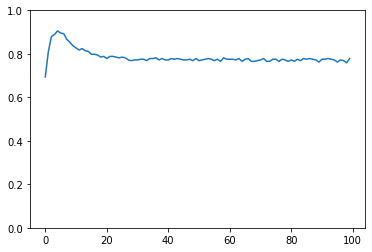

In [246]:
w_mat=perceptron.fit(X_scaled_train,Y_train,100,0.009)